**Implementation of convolutional neural network to predict numbers from number**
**images**

In [1]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

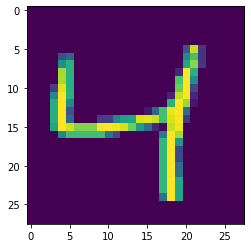

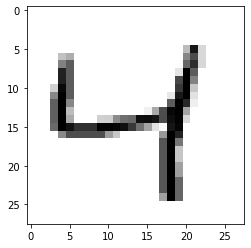

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])
plt.show()
plt.imshow(X_train[2], cmap=plt.cm.binary)

In [10]:
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

**Normalizing the data**

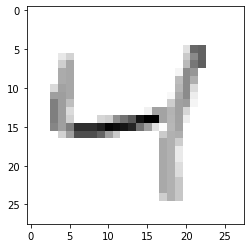

In [11]:
X_train = tf.keras.utils.normalize(X_train, axis=1) 
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[2], cmap=plt.cm.binary)

In [12]:
print(X_train[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
import tensorflow as tf
import tensorflow.keras.layers  as KL
import tensorflow.keras.models  as KM
## Model
inputs = KL.Input(shape=(28, 28, 1))
c = KL.Conv2D(32, (3, 3), padding="valid", activation=tf.nn.relu)(inputs)
m = KL.MaxPool2D((2, 2), (2, 2))(c)
d = KL.Dropout(0.5)(m)
c = KL.Conv2D(64, (3, 3), padding="valid", activation=tf.nn.relu)(d)
m = KL.MaxPool2D((2, 2), (2, 2))(c)
d = KL.Dropout(0.5)(m)
c = KL.Conv2D(128, (3, 3), padding="valid", activation=tf.nn.relu)(d)
f = KL.Flatten()(c)
outputs = KL.Dense(10, activation=tf.nn.softmax)(f)
model = KM.Model(inputs, outputs)
model.summary()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0     

In [14]:
model.fit(X_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss: {0} - Test Acc: {1}".format(test_loss, test_acc))

Epoch 1/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.5309 - accuracy: 0.8222
Epoch 2/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1018 - accuracy: 0.9682
Epoch 3/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0739 - accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0593 - accuracy: 0.9809
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0343 - accuracy: 0.9892
Test Loss: 0.034317463636398315 - Test Acc: 0.9891999959945679
